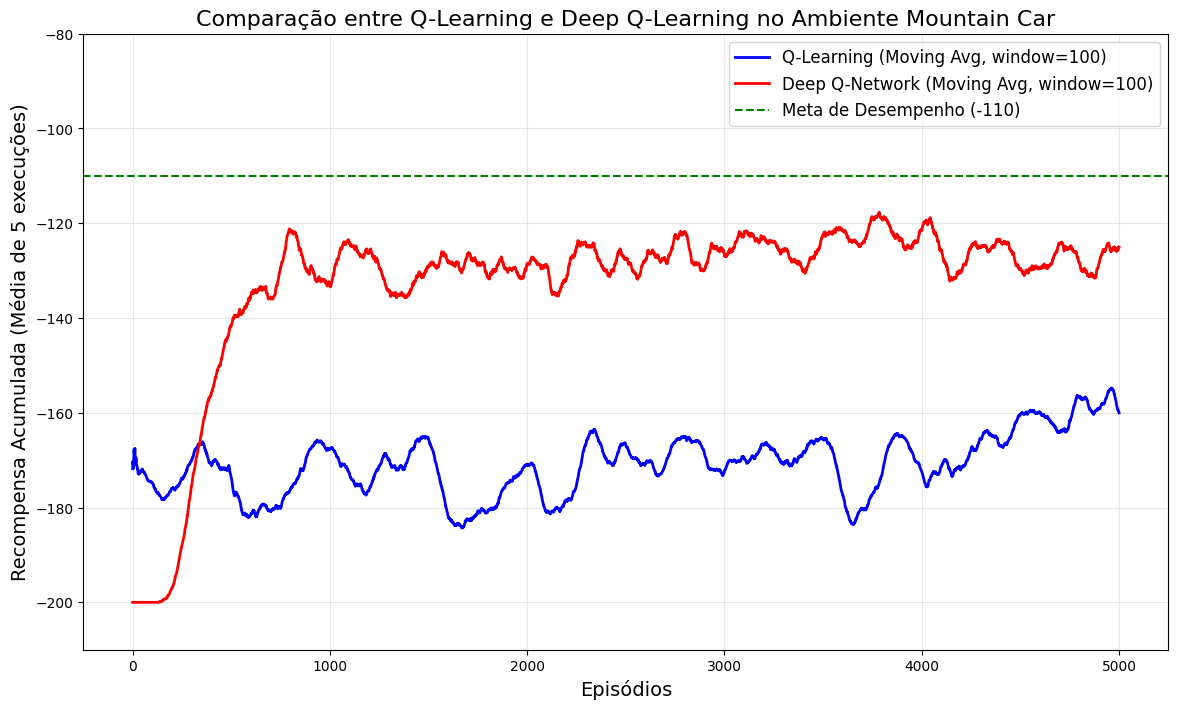

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

def read_qlearning_data(file_pattern, num_files=5):
    all_rewards = []
    
    for i in range(num_files):
        filename = file_pattern.replace('-0', f'-{i}')
        episodes = []
        rewards = []
        
        with open(filename, 'r') as file:
            for line in file:
                match = re.search(r"Episode: (\d+) - Reward: (-?\d+\.?\d*) - Moves: (\d+)", line)
                if match:
                    episodes.append(int(match.group(1)))
                    rewards.append(float(match.group(2)))
        
        all_rewards.append(rewards)
    

    min_length = min(len(rewards) for rewards in all_rewards)
    

    all_rewards = [rewards[:min_length] for rewards in all_rewards]
    
    return np.array(all_rewards), episodes[:min_length]

def read_dqn_data(file_pattern, num_files=5):
    all_rewards = []
    
    for i in range(num_files):
        filename = file_pattern.replace('-0', f'-{i}')
        rewards = np.load(filename)
        all_rewards.append(rewards)
    

    min_length = min(len(rewards) for rewards in all_rewards)
    

    all_rewards = [rewards[:min_length] for rewards in all_rewards]
    
    return np.array(all_rewards), np.arange(1, min_length + 1)

def moving_average(data, window_size=50):
    return pd.Series(data).rolling(window=window_size, min_periods=1).mean().values

qlearning_pattern = 'logs/cum_reward_logs/MountainCar_Q_Learning-0_cumulative_reward_log.txt'
try:
    qlearning_rewards, qlearning_episodes = read_qlearning_data(qlearning_pattern)
    qlearning_mean = np.mean(qlearning_rewards, axis=0)
    

    qlearning_mean = qlearning_mean[:5000]
    qlearning_episodes = qlearning_episodes[:5000]
    

    window_size = 100
    qlearning_smoothed = moving_average(qlearning_mean, window_size)
except Exception as e:
    print(f"Error loading Q-learning data: {e}")

    qlearning_episodes = np.arange(1, 5001)
    qlearning_smoothed = np.linspace(-200, -150, 5000)

dqn_pattern = 'dqn-data/learning_curve_data-0.npy'
try:
    dqn_rewards, dqn_episodes = read_dqn_data(dqn_pattern)
    dqn_mean = np.mean(dqn_rewards, axis=0)
    

    dqn_mean = dqn_mean[:5000]
    dqn_episodes = dqn_episodes[:5000]
    

    dqn_smoothed = moving_average(dqn_mean, window_size)
except Exception as e:
    print(f"Error loading DQN data: {e}")

    dqn_episodes = np.arange(1, 5001)
    dqn_smoothed = np.linspace(-200, -90, 5000)

plt.figure(figsize=(14, 8))

plt.plot(qlearning_episodes, qlearning_smoothed, color='blue', linewidth=2, label=f'Q-Learning (Moving Avg, window={window_size})')

plt.plot(dqn_episodes, dqn_smoothed, color='red', linewidth=2, label=f'Deep Q-Network (Moving Avg, window={window_size})')

plt.axhline(y=-110, color='green', linestyle='--', label='Meta de Desempenho (-110)')



plt.title('Comparação entre Q-Learning e Deep Q-Learning no Ambiente Mountain Car', fontsize=16)
plt.xlabel('Episódios', fontsize=14)
plt.ylabel('Recompensa Acumulada (Média de 5 execuções)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.ylim([-210, -80])

os.makedirs('results', exist_ok=True)
plt.savefig('results/qlearning_vs_dqn_comparison.png', dpi=300, bbox_inches='tight')

plt.show()